## 2. Bike Sharing: Predicción de Demanda Horaria

### a) Carga de datos de entrenamiento y de prueba

In [2]:
import pandas as pd
import numpy as np
dftrain = pd.read_csv('bike_sharing_train.csv')
dfval = pd.read_csv('bike_sharing_val.csv')
dftest = pd.read_csv('bike_sharing_test.csv')
ntrain = len(dftrain)
nval = len(dftrain) + len(dfval)
df = pd.concat([dftrain,dfval,dftest])
print('\nSummary - dataframe completo:\n')
print(df.describe())
df['hour'] = pd.to_datetime(df['datetime']).apply(lambda x: x.strftime('%H'))
df['hour'] = pd.to_numeric(df['hour'])
print "\n"
df.info()


Summary - dataframe completo:

         Unnamed: 0        season       holiday    workingday       weather  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean    5442.500000      2.506614      0.028569      0.680875      1.418427   
std     3142.661849      1.116174      0.166599      0.466159      0.633839   
min        0.000000      1.000000      0.000000      0.000000      1.000000   
25%     2721.250000      2.000000      0.000000      0.000000      1.000000   
50%     5442.500000      3.000000      0.000000      1.000000      1.000000   
75%     8163.750000      4.000000      0.000000      1.000000      2.000000   
max    10885.000000      4.000000      1.000000      1.000000      4.000000   

              temp         atemp      humidity     windspeed        casual  \
count  10886.00000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      20.23086     23.655084     61.886460     12.799395     36.021955   
std        7.79159    

Se generó un dataframe con la ayuda de *pandas*, en donde se muestran los datos (de entrenamiento y prueba) estadísticos de cada variable involucrada. Dichas variables son:

- **season: ** números enteros cuyos valores son 4, donde cada uno de ellos corresponde a una estación del año.
  * 1 = spring (primavera)
  * 2 = summer (verano)
  * 3 = fall (otoño) 
  * 4 = winter (invierno)


- **holiday: ** variable booleana que indica si es un día festivo o no.
- **workingday: ** variable booleana que indica si no es fin de semana o festivo, o lo es.
- **weather: ** número entero del 1 al 4 que describa el clima del día.
  * 1 = Clear, Few clouds, Partly cloudy, Partly cloudy
  * 2 = Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  * 3 = Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  * 4 = Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog.


- **temp: ** variable flotante que indica la temperatura en grados Celcius (°C).
- **atemp: ** variable flotante que indica la temperatura *al tacto*.
- **humidity: ** variable entera que indica la humedad relativa del día.
- **windspeed: ** variable flotante indica la velocidad del viento del día.
- **casual: ** variable entera que indica el número de rentas de usuarios **no** registrados
- **registered: ** variable entera que indica el número de rentas de usuarios registrados
- **count: ** variable entera que indica el número total de rentas de bicicletas.

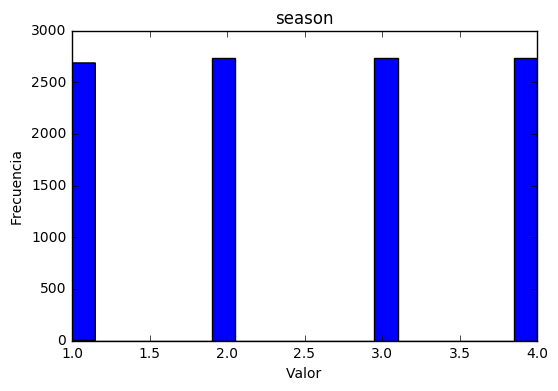

In [6]:
#Histograma de variables.
import matplotlib.pyplot as plt
variable = 'season'
plt.hist(df[variable], bins = 20)
plt.title(variable)
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.show()

### b) Entrenamiento de un árbol de regresión

SCORE TEST=0.703388
KAGG EVAL TRAIN =0.028516
KAGG EVAL TEST =0.574239


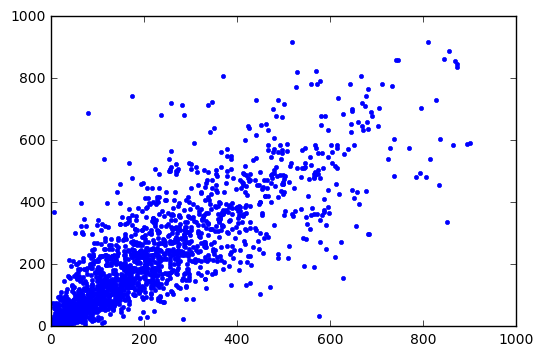

In [2]:
from sklearn.tree import DecisionTreeRegressor as Tree
def eval_bikemodel(y_predict,y_true):
    diff = np.log(y_predict+1.0) - np.log(y_true+1.0)
    return np.sqrt(np.sum(np.square(diff))/len(y_predict))
Xdf=df.ix[:,['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','hour']]
Ydf=df.ix[:,'count']
X_train = Xdf[0:ntrain].values
X_val = Xdf[ntrain:nval].values
X_test = Xdf[nval:].values
Y_train = Ydf[0:ntrain].values
Y_val = Ydf[ntrain:nval].values
Y_test = Ydf[nval:].values

model = Tree(random_state=0)
model.fit(X_train,Y_train)
score_test = model.score(X_test,Y_test)
print "SCORE TEST=%f"%score_test

Y_pred_train = model.predict(X_train)
Y_pred_val = model.predict(X_val)
Y_pred_test = model.predict(X_test)
kagg_train = eval_bikemodel(Y_pred_train,Y_train)
kagg_val = eval_bikemodel(Y_pred_val,Y_val)
kagg_test = eval_bikemodel(Y_pred_test,Y_test)
print "KAGG EVAL TRAIN =%f"%kagg_train
print "KAGG EVAL TEST =%f"%kagg_test

plt.plot(Y_test,Y_pred_test,'.')
plt.show()

Utilizando el árbol de regresión ajustándolo con los datos de entrenamiento, se obtiene un puntaje sobre los datos de prueba y su valor corresponde a 0.703388, lo que significa que el modelo del árbol de regresión se encuentra dentro del top-100 del *leaderboard* final ya que el valor es superior a 0.37748.

Luego se procedió a evaluar los datos de entrenamiento y de prueba a partir de la función *eval_bikemodel()* que es un modelo predictivo que utiliza la siguiente ecuación:

$$E_{bikes}(y,\widehat{y})=\frac{1}{n}\sum_{i}(\ln{(y_{i}+1)}-\ln{(\widehat{y}_{i}+1)})^{2}$$

Con esto se han obtenido los siguientes puntajes para los datos predictivos de entrenamiento y de prueba:

* Puntaje entrenamiento: 0.028516
* Puntaje prueba: 0.574239

Por lo tanto, utilizando el modelo predictivo para el concurso de Kaggle, con los datos predictivos de entrenamiento no cumple con el objetivo de estar dentro del top-100 del *leaderboard* final por su puntaje muy debajo de lo requerido (0.37748). Por otro lado, con los datos predictivos de prueba se obtuvo un puntaje superior al requerido y se encuentra dentro del dicho top-100. Finalmente el modelo predictivo resulta más eficiente utilizando los datos de prueba.

### c) Mejore el árbol de regresión definido en el punto anterior haciendo modificaciones a los hiper-parámetros del modelo.

In [12]:
for i in range(1,21):
    model = Tree(random_state=0,max_depth=i)
    model.fit(X_val, Y_val)
    Y_pred_val = model.predict(X_val)
    kagg_val = eval_bikemodel(Y_pred_val,Y_val)
    print "KAGG EVAL VAL =%f"%kagg_val

KAGG EVAL VAL =0.971024
KAGG EVAL VAL =0.881385
KAGG EVAL VAL =0.787303
KAGG EVAL VAL =0.713216
KAGG EVAL VAL =0.636034
KAGG EVAL VAL =0.546599
KAGG EVAL VAL =0.479327
KAGG EVAL VAL =0.397123
KAGG EVAL VAL =0.336811
KAGG EVAL VAL =0.280020
KAGG EVAL VAL =0.220248
KAGG EVAL VAL =0.176091
KAGG EVAL VAL =0.135300
KAGG EVAL VAL =0.104221
KAGG EVAL VAL =0.082080
KAGG EVAL VAL =0.065551
KAGG EVAL VAL =0.052884
KAGG EVAL VAL =0.040147
KAGG EVAL VAL =0.033975
KAGG EVAL VAL =0.027759


La modificación realizada es la siguiente: limitar la profundidad máxima del árbol de regresión. Como se puede apreciar en el output, el *score* irá disminuyendo a medida que la profundidad máxima del árbol de regresión, por lo que no es conveniente para este caso aumentar la profundidad máxima del árbol. Sin embargo, si la profundidad del árbol es menor, el *score* irá mejorando, por ejemplo, en este caso se puede apreciar que un árbol de regresión con profundidad máxima 8, cumple con el objetivo del problema: obtener un *score* mayor o igual a 0.37748. Este tipo de modificaciones están prohibidas, por lo que sería mejor aplicar alguna técnica que ayude a mejorar el árbol de regresión.

### d) Mejore el árbol de regresión definido en el punto anterior haciendo modificaciones sobre la representación utilizada para aprender desde los datos.

In [4]:
df['cday'] = pd.to_datetime(df['datetime']).dt.dayofweek#0:lunes,6:domingo
df['cday'] = pd.to_numeric(df['cday'])
Xdf=df.ix[:,['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','hour','cday']]

### e) Entrene una SVM no lineal para resolver el problema midiendo el efecto de las distintas representaciones que haya descubierto hasta este punto.

In [7]:
#load dataframes as before ...
df = pd.concat([dftrain,dfval,dftest])
df['hour'] = pd.to_datetime(df['datetime']).apply(lambda x: x.strftime('%H'))
df['cday'] = pd.to_datetime(df['datetime']).dt.dayofweek
df['hour'] = pd.to_numeric(df['hour'])
df['cday'] = pd.to_numeric(df['cday'])
Xdf=df.ix[:,['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','hour','cday']]
#PASO IMPORTANTE MAS ABAJO ...
Xdf = pd.get_dummies(Xdf,columns=['season', 'weather','hour','cday'])
Ydf=df.ix[:,'count']

from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler()
X_train = scalerX.fit_transform(X_train)
X_val = scalerX.fit_transform(X_val)
X_test = scalerX.transform(X_test)

from sklearn.svm import SVR
model = SVR()
model.fit(X_train,Y_train)
Y_pred_train = model.predict(X_train)
Y_pred_val = model.predict(X_val)
Y_pred_test = model.predict(X_test)

### f) Mejore la SVM definida en el punto anterior haciendo modificaciones a los hiper-parámetros de la máquina

In [8]:
model = SVR(C=1,epsilon=0.01)
kagg_train = eval_bikemodel(Y_pred_train,Y_train)
kagg_val = eval_bikemodel(Y_pred_val,Y_val)
print "KAGG EVAL TRAIN =%f"%kagg_train
print "KAGG EVAL VAL =%f"%kagg_val

KAGG EVAL TRAIN =nan
KAGG EVAL VAL =nan


### g) Evalúe el efecto de utilizar el dataset de validación para entrenamiento y seleccionar los parámetros estructurales del árbol de clasificación y la SVM usando validación cruzada.

In [10]:
from sklearn import cross_validation
k_fold = cross_validation.KFold(len(X_train),10)
score_cv = 0
for k, (train, val) in enumerate(k_fold):
    model = #define your model, e.g. model = SVR(C=candidate)
    model.fit(X_train[train], Y_train[train])
    Ypred_val = model.predict(X_train[val])
    Ytrue_val = Y_train[val]
    score_fold = eval_bikemodel(Ypred_val,Ytrue_val)
    score_cv += score_fold
score_cv = score_cv / 10

NameError: name 'candidate' is not defined

### h) Evalúe el efecto de utilizar un ensamblado de 2 máquinas de aprendizaje para predecir la demanda total de bicicletas.

In [11]:
Ydf=df.ix[:,'count'] #demanda total
Ydf=df.ix[:,'registered'] #demanda registrada
Ydf=df.ix[:,'casual'] #demanda casual

### i) Evalíe el efecto de utilizar un algoritmo genérico para ensamblar máquinas de aprendizaje para predecir la demanda total de bicicletas.

In [12]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=10,max_depth=max_depth,random_state=0)

NameError: name 'max_depth' is not defined